In [13]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

### Generate random data

In [14]:
def generate_interest_rate_data(start_datetime, duration_seconds):
    # Create a range of timestamps at 1-second intervals for the specified duration
    timestamps = pd.date_range(start=start_datetime, periods=duration_seconds, freq='S')
    # Generate random interest rate levels for each timestamp
    interest_rates = np.random.uniform(0, 10, size=len(timestamps))
    # Create the DataFrame
    df = pd.DataFrame({'Datetime': timestamps, 'Interest Rate': interest_rates})
    return df

In [15]:
start_datetime = pd.Timestamp('2018-10-17 15:56:00+11:00')
duration_seconds = 3600

# Generate the DataFrame
df = generate_interest_rate_data(start_datetime, duration_seconds)

# Display the DataFrame
df.head()

,Datetime,Interest Rate
0,2018-10-17 15:56:00+11:00,5.556923
1,2018-10-17 15:56:01+11:00,5.741296
2,2018-10-17 15:56:02+11:00,2.011632
3,2018-10-17 15:56:03+11:00,5.563313
4,2018-10-17 15:56:04+11:00,7.930730


In [16]:
df.dtypes

Datetime         datetime64[ns, pytz.FixedOffset(660)]
Interest Rate                                  float64
dtype: object

### Compute_realized_volatility function
#### For a 5min realized vol (on 1 datapoint each second)

def compute_realized_volatility(data, window_minutes):
    # Compute the number of periods based on the window size
    window_periods = int(window_minutes * 60)
    # Calculate the difference between interest rates
    data['Rate Difference'] = data['Interest Rate'].diff()  
    # Calculate the squared differences
    data['Squared Difference'] = data['Rate Difference']**2
    # Compute the rolling sum of squared differences for the given window
    data['Rolling Sum'] = data['Squared Difference'].rolling(window_periods).sum()
    # Compute the realized volatility as the square root of the rolling sum
    data['Realized Volatility'] = data['Rolling Sum'].apply(lambda x: x**0.5)
    # Drop intermediate columns
    data = data.drop(['Rate Difference', 'Squared Difference', 'Rolling Sum'], axis=1)
    return data

#Assuming you already have the DataFrame named 'df' with datetime and interest rate columns
window_minutes = 5  # Specify the window size in minutes
#Apply the function to compute realized volatility
df = compute_realized_volatility(df, window_minutes)
#Display the updated DataFrame
#Set display options to show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
df.tail()

### Realized_volatility function
#### For a list of number of minutes realized vol (on 1 datapoint each second)

In [17]:
def realized_volatility(data, window_minutes_list):
    for window_minutes in window_minutes_list:
        # Compute the number of periods based on the window size
        window_periods = int(window_minutes * 60)

        # Calculate the difference between interest rates
        data['Rate Difference'] = data['Interest Rate'].diff()

        # Calculate the squared differences
        data['Squared Difference'] = data['Rate Difference']**2

        # Compute the rolling sum of squared differences for the given window
        data['Rolling Sum'] = data['Squared Difference'].rolling(window_periods).sum()

        # Compute the realized volatility as the square root of the rolling sum
        col_name = f'Realized Volatility {window_minutes}min'
        data[col_name] = data['Rolling Sum'].apply(lambda x: x**0.5)

        # Drop intermediate columns
        data = data.drop(['Rate Difference', 'Squared Difference', 'Rolling Sum'], axis=1)

    return data

In [18]:
df.head()

,Datetime,Interest Rate
0,2018-10-17 15:56:00+11:00,5.556923
1,2018-10-17 15:56:01+11:00,5.741296
2,2018-10-17 15:56:02+11:00,2.011632
3,2018-10-17 15:56:03+11:00,5.563313
4,2018-10-17 15:56:04+11:00,7.930730


In [19]:
# Assuming you already have the DataFrame named 'df' with datetime and interest rate columns
window_minutes_list = [1, 5, 15, 30, 60]  # Specify the window sizes in minutes

# Apply the function to compute realized volatility for each window size
df = realized_volatility(df, window_minutes_list)

# Display the updated DataFrame
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
df.tail(50)

,Datetime,Interest Rate,Realized Volatility 1min,Realized Volatility 5min,Realized Volatility 15min,Realized Volatility 30min,Realized Volatility 60min
3550,2018-10-17 16:55:10+11:00,7.324433,29.470385,74.819825,126.352534,175.697958,NaN
3551,2018-10-17 16:55:11+11:00,1.583131,29.644798,74.990093,126.264454,175.789622,NaN
3552,2018-10-17 16:55:12+11:00,7.658031,30.009682,75.165731,126.410377,175.882713,NaN
3553,2018-10-17 16:55:13+11:00,3.772978,30.257734,75.122942,126.410047,175.851685,NaN
3554,2018-10-17 16:55:14+11:00,7.921640,30.539790,75.221865,126.463990,175.717138,NaN
3555,2018-10-17 16:55:15+11:00,9.100278,30.240745,75.167317,126.353762,175.719669,NaN
3556,2018-10-17 16:55:16+11:00,3.712986,30.443940,75.344828,126.272724,175.663709,NaN
3557,2018-10-17 16:55:17+11:00,6.377984,30.491738,75.349842,126.300843,175.601014,NaN
3558,2018-10-17 16:55:18+11:00,8.220702,30.520669,75.356333,126.213428,175.538817,NaN
3559,2018-10-17 16:55:19+11:00,3.123895,30.936282,75.521264,126.303009,175.611485,NaN


## Annualized Realized volatilities

#### Genereating the Data

In [20]:
start_datetime = pd.Timestamp('2018-10-17 15:56:00+11:00')
duration_seconds = 7200

# Generate the DataFrame
df = generate_interest_rate_data(start_datetime, duration_seconds)
df.head()

,Datetime,Interest Rate
0,2018-10-17 15:56:00+11:00,3.901431
1,2018-10-17 15:56:01+11:00,5.264511
2,2018-10-17 15:56:02+11:00,0.157617
3,2018-10-17 15:56:03+11:00,0.824445
4,2018-10-17 15:56:04+11:00,3.323619


#### Defining the function

In [ ]:
def compute_realized_volatility(data, window_minutes_list):
    for window_minutes in window_minutes_list:
        # Compute the number of periods based on the window size
        window_periods = int(window_minutes * 60)

        # Calculate the difference between interest rates
        data['Rate Difference'] = data['Interest Rate'].diff()

        # Calculate the squared differences
        data['Squared Difference'] = data['Rate Difference']**2

        # Compute the rolling sum of squared differences for the given window
        data['Rolling Sum'] = data['Squared Difference'].rolling(window_periods).sum()

        # Compute the realized volatility as the square root of the rolling sum
        col_name = f'Realized Volatility {window_minutes}min'
        data[col_name] = data['Rolling Sum'].apply(lambda x: x**0.5)

        # Drop intermediate columns
        data = data.drop(['Rate Difference', 'Squared Difference', 'Rolling Sum'], axis=1)

    return data

In [ ]:
# Assuming you already have the DataFrame named 'df' with datetime and interest rate columns
window_minutes_list = [1, 5, 15, 30, 60]  # Specify the window sizes in minutes

# Apply the function to compute annualized realized volatility for each window size
df = compute_realized_volatility(df, window_minutes_list)

# Display the updated DataFrame
df.tail()

In [ ]:
import datetime as dt
df['Datetime'].apply(lambda x: dt.datetime.strptime(x, "%Y-%m%d %H:%M:%S"))

In [ ]:
df.dtypes

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Drop rows with NaN values
df.dropna(inplace=True)

# Filter column names ending with "RV"
rv_columns = list(filter(lambda col: col.startswith('Realized Volatility '), df.columns))

# Plot each RV value against time
sns.set(style="darkgrid")

plt.figure(figsize=(12, 6))
plt.title("Realized Volatilities")

for rv_column in rv_columns:
    sns.lineplot(data=df, x='dateTime', y=rv_column, label=rv_column)

plt.xlabel('Date and Time')
plt.ylabel('Realized Volatility')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Plot Vol Grid
This is assuming I already have the data

In [4]:
import pandas as pd

# Define the list of expiries and tenors
expiries = ['3M', '6M', '9M', '12M', '18M', '2Y', '3Y', '5Y', '10Y']
tenors = ['3M', '6M', '9M', '12M', '18M', '2Y', '3Y', '5Y', '10Y']

# Create an empty list to store the data
data = []

# Generate the data for the swaption volatility grid
for expiry in expiries:
    for tenor in tenors:
        volatility = round((0.025 + (expiries.index(expiry) + tenors.index(tenor)) * 0.003), 3)  # Randomly generated volatility values
        data.append([tenor, expiry, volatility])

# Create the dataframe
df = pd.DataFrame(data, columns=['Tenor', 'Expiry', 'Volatility'])
df

,Tenor,Expiry,Volatility
0,3M,3M,0.025
1,6M,3M,0.028
2,9M,3M,0.031
3,12M,3M,0.034
4,18M,3M,0.037
...,...,...,...
76,18M,10Y,0.061
77,2Y,10Y,0.064
78,3Y,10Y,0.067
79,5Y,10Y,0.070


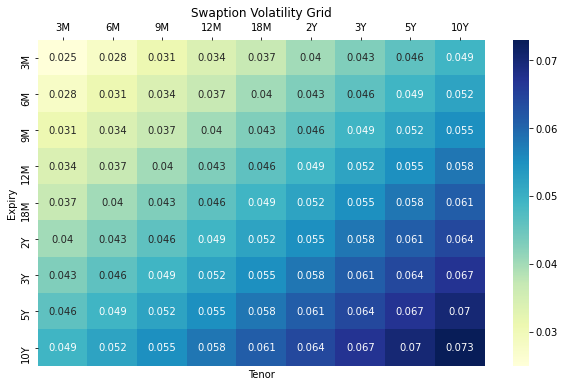

In [5]:
# Convert 'Tenor' and 'Expiry' columns to categorical data type with specified order
df['Tenor'] = pd.Categorical(df['Tenor'], categories=tenors, ordered=True)
df['Expiry'] = pd.Categorical(df['Expiry'], categories=expiries, ordered=True)  # Reverse the order of expiries

# Sort the dataframe based on 'Expiry' and 'Tenor' columns
df = df.sort_values(by=['Expiry', 'Tenor'])

import seaborn as sns
import matplotlib.pyplot as plt

# Reshape the dataframe for heatmap visualization
heatmap_data = df.pivot("Expiry", "Tenor", "Volatility")

# Create the heatmap using seaborn
plt.figure(figsize=(10, 6))
ax = sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu", cbar=True)

# Move the x-axis tick marks to the top
ax.xaxis.tick_top()

# Set the axis labels and plot title
plt.xlabel("Tenor")
plt.ylabel("Expiry")
plt.title("Swaption Volatility Grid")

# Display the heatmap
plt.show()

# Avg annualized vol on diff timeframes, per hour
Each hour, we compare the annualized vols for 1min, 5min, 15min ... 60min window.

### We first generate some data

In [11]:
import pandas as pd
import random
import datetime

# Create a list of timestamps
timestamps = pd.date_range(start='2023-07-01', end='2023-07-05', freq='min')

# Generate random data for each column
data = {
    'Datetime': timestamps,
    'Rate': [random.uniform(1, 10) for _ in range(len(timestamps))],
    'RV_1min': [random.uniform(0.01, 0.1) for _ in range(len(timestamps))],
    'RV_5min': [random.uniform(0.05, 0.2) for _ in range(len(timestamps))],
    'RV_15min': [random.uniform(0.1, 0.3) for _ in range(len(timestamps))],
    'RV_30min': [random.uniform(0.2, 0.4) for _ in range(len(timestamps))],
    'RV_60min': [random.uniform(0.3, 0.5) for _ in range(len(timestamps))]
}

# Create the dataframe
df = pd.DataFrame(data)

# Print the dataframe
display(df)


,Datetime,Rate,RV_1min,RV_5min,RV_15min,RV_30min,RV_60min
0,2023-07-01 00:00:00,2.365638,0.030117,0.098840,0.116908,0.387171,0.319254
1,2023-07-01 00:01:00,3.689855,0.074857,0.160496,0.242471,0.303048,0.355295
2,2023-07-01 00:02:00,4.138103,0.084021,0.093509,0.137644,0.270379,0.381667
3,2023-07-01 00:03:00,5.153992,0.065617,0.108160,0.158731,0.272255,0.467598
4,2023-07-01 00:04:00,5.069341,0.024316,0.174407,0.121712,0.247455,0.357573
...,...,...,...,...,...,...,...
5756,2023-07-04 23:56:00,3.032308,0.095131,0.176600,0.172339,0.380382,0.369412
5757,2023-07-04 23:57:00,1.250988,0.066938,0.166478,0.136829,0.337807,0.498449
5758,2023-07-04 23:58:00,5.447063,0.094940,0.075930,0.114844,0.369852,0.428226
5759,2023-07-04 23:59:00,5.740186,0.043949,0.111606,0.275339,0.347685,0.496903


In [7]:
# Assuming your original dataframe is called 'df' containing the timeseries data

# Convert 'Datetime' column to datetime type
df['Datetime'] = pd.to_datetime(df['Datetime'])

# Create a new column 'Hour' to extract the hour from the timestamp
df['Hour'] = df['Datetime'].dt.hour

# Define the hourly ranges
hourly_ranges = [
    (7, 30), (8, 30), (9, 30), (10, 30), (11, 30), (12, 30), (13, 30), (14, 30), (15, 30), (16, 30)
]

# Create an empty dataframe to store the grouped data
grouped_df = pd.DataFrame(columns=['Hour Range', 'Mean RV_1min', 'Mean RV_5min', 'Mean RV_15min', 'Mean RV_30min', 'Mean RV_60min'])

# Iterate over the hourly ranges
for i in range(len(hourly_ranges) - 1):
    start_hour, start_minute = hourly_ranges[i]
    end_hour, end_minute = hourly_ranges[i + 1]
    
    # Filter the rows within the hour range
    hour_range_df = df[(df['Hour'] >= start_hour) & (df['Hour'] < end_hour)]
    
    # Calculate the mean of the realized volatilities for each column
    mean_rv_1min = hour_range_df['RV_1min'].mean()
    mean_rv_5min = hour_range_df['RV_5min'].mean()
    mean_rv_15min = hour_range_df['RV_15min'].mean()
    mean_rv_30min = hour_range_df['RV_30min'].mean()
    mean_rv_60min = hour_range_df['RV_60min'].mean()
    
    # Add the row to the grouped dataframe
    grouped_df.loc[i] = [f'{start_hour}:{start_minute} - {end_hour}:{end_minute}', mean_rv_1min, mean_rv_5min, mean_rv_15min, mean_rv_30min, mean_rv_60min]

# Print the grouped dataframe
print(grouped_df)


      Hour Range  Mean RV_1min  Mean RV_5min  Mean RV_15min  Mean RV_30min  \
0    7:30 - 8:30      0.055361      0.129206       0.203747       0.289800   
1    8:30 - 9:30      0.055029      0.128498       0.198607       0.306524   
2   9:30 - 10:30      0.051395      0.126546       0.197246       0.302442   
3  10:30 - 11:30      0.053889      0.124373       0.202802       0.299696   
4  11:30 - 12:30      0.055479      0.124954       0.202278       0.300718   
5  12:30 - 13:30      0.055653      0.128092       0.199748       0.298130   
6  13:30 - 14:30      0.054322      0.125546       0.202061       0.299135   
7  14:30 - 15:30      0.051250      0.123154       0.193951       0.296949   
8  15:30 - 16:30      0.056463      0.125866       0.201100       0.296485   

   Mean RV_60min  
0       0.397652  
1       0.405383  
2       0.398059  
3       0.409893  
4       0.401341  
5       0.400384  
6       0.404333  
7       0.402699  
8       0.398939  


In [8]:
grouped_df.dtypes

Hour Range        object
Mean RV_1min     float64
Mean RV_5min     float64
Mean RV_15min    float64
Mean RV_30min    float64
Mean RV_60min    float64
dtype: object

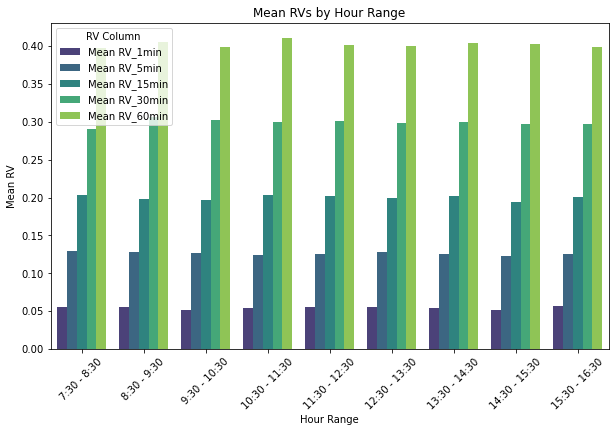

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your grouped dataframe is called 'grouped_df'

# Melt the dataframe to convert the RV columns into a single column
melted_df = grouped_df.melt(id_vars=['Hour Range'], var_name='RV Column', value_name='Mean RV')

# Create the bar plot using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=melted_df, x='Hour Range', y='Mean RV', hue='RV Column', palette='viridis')

# Set the axis labels and plot title
plt.xlabel('Hour Range')
plt.ylabel('Mean RV')
plt.title('Mean RVs by Hour Range')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Display the plot
plt.show()
